In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/number-plate-detection/data.yaml
/kaggle/input/number-plate-detection/images/N148.xml
/kaggle/input/number-plate-detection/images/N177.xml
/kaggle/input/number-plate-detection/images/N40.jpeg
/kaggle/input/number-plate-detection/images/N176.jpeg
/kaggle/input/number-plate-detection/images/N173.xml
/kaggle/input/number-plate-detection/images/N129.jpeg
/kaggle/input/number-plate-detection/images/N114.jpeg
/kaggle/input/number-plate-detection/images/N231.jpeg
/kaggle/input/number-plate-detection/images/N69.jpeg
/kaggle/input/number-plate-detection/images/N213.xml
/kaggle/input/number-plate-detection/images/N119.xml
/kaggle/input/number-plate-detection/images/N212.jpeg
/kaggle/input/number-plate-detection/images/N52.jpeg
/kaggle/input/number-plate-detection/images/N103.xml
/kaggle/input/number-plate-detection/images/N154.jpeg
/kaggle/input/number-plate-detection/images/N166.xml
/kaggle/input/number-plate-detection/images/N127.xml
/kaggle/input/number-plate-detection/images/N1

In [13]:
!pip install easyocr
!pip install imutils
!pip install opencv-python
!pip install matplotlib


In [14]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random


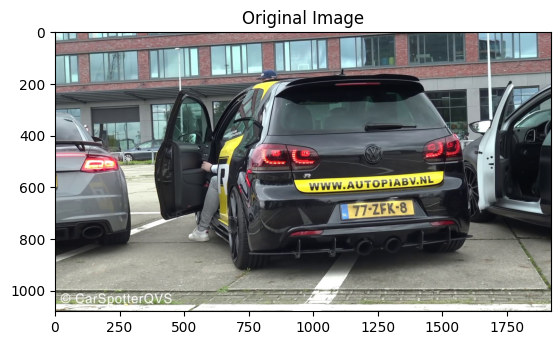

Text(0.5, 1.0, 'Processed Image')

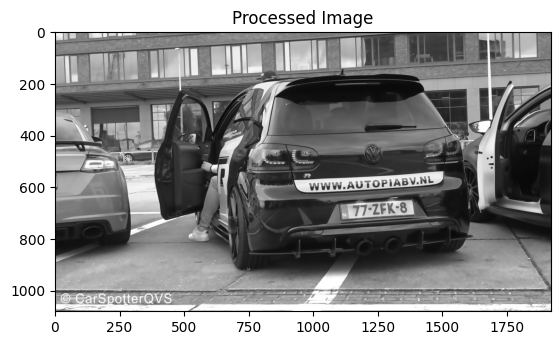

In [15]:

img = cv2.imread("/kaggle/input/number-plate-detection/images/N1.jpeg") #read image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB)) #show processed image
plt.title('Processed Image')


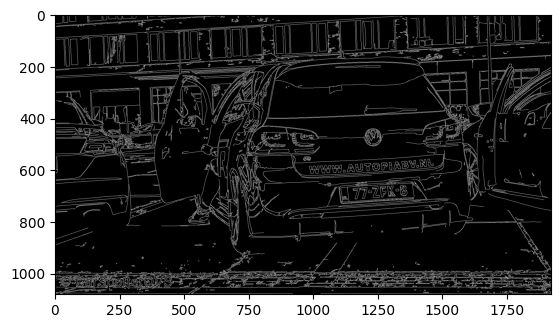

In [16]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [20]:
#Loop over our contours to find the best possible approximate contour of 10 contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
     
print("Location: ", location)


Location:  [[[1382  659]]

 [[1103  675]]

 [[1110  723]]

 [[1385  707]]]


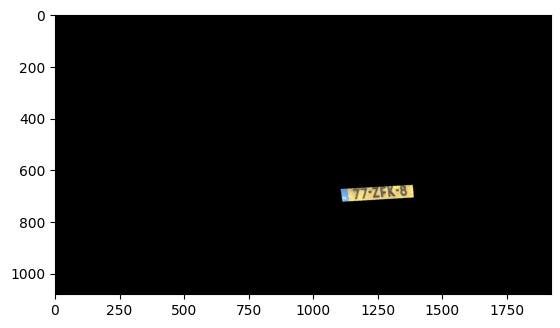

In [21]:
mask = np.zeros(gray.shape, np.uint8) #create blank image with same dimensions as the original image
new_image = cv2.drawContours(mask, [location], 0,255, -1) #Draw contours on the mask image
new_image = cv2.bitwise_and(img, img, mask=mask) #Take bitwise AND between the original image and mask image

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) #show the final image


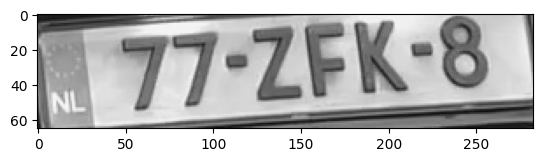

In [22]:
(x,y) = np.where(mask==255) #Find the co-ordinates of the four corners of the document
(x1, y1) = (np.min(x), np.min(y)) #Find the top left corner
(x2, y2) = (np.max(x), np.max(y)) #Find the bottom right corner
cropped_image = gray[x1:x2+1, y1:y2+1] #Crop the image using the co-ordinates

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) #show the cropped image


In [23]:
reader = easyocr.Reader(['en']) #create an easyocr reader object with english as the language
result = reader.readtext(cropped_image) #read text from the cropped image
result


[([[39, 0], [268, 0], [268, 65], [39, 65]], 'TZFK-8', 0.8862286729539481)]

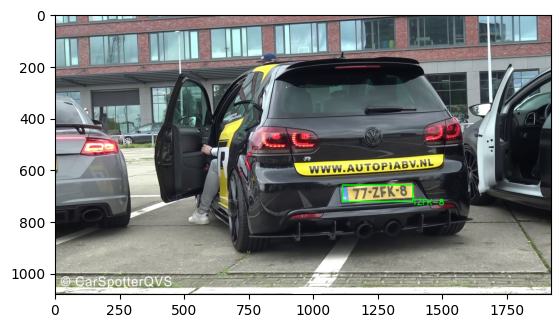

In [24]:
text = result[0][-2] #Extract the text from the result
font = cv2.FONT_HERSHEY_SIMPLEX #Font style
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA) #put the text on the image
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) #Draw a rectangle around the text

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) #show the final image with text
